# Importacion de los textos

In [ ]:
#Importamos todas las librerias necesarias
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

import matplotlib.pyplot as plt

In [ ]:
#Importamos el dataset
csv_data = 'data.csv'

#Utilizamos el parametro header = none dado que no hay fila con las etiquetas.
datos = pd.read_csv(csv_data, header=None)

# Preprocesamiento de datos


---


## Eliminacion
Decidimos eliminar todas las filas que tengan todos los datos nulos o vacios, dado que son inutiles y solo generarian incongruencia e imprecision. Sin embargo, no hubo ningun caso aplicable.


1.   Elemento de la lista
2.   Elemento de la lista


Luego eliminamos las columnas que tienen demasiados datos de tipo String, dado que al carecer tanto de informacion como que significan esos datos, al convertirlos a un valor numerico podriamos arrastrar un error. 

In [ ]:
datos = datos.dropna(how='all')
datos = datos[datos != '?']
datos = datos.dropna(axis = 0)
datos = datos.drop(columns = [3,4,5,6,12], axis = 1)

No encontramos ninguna columna que contenga mas de la mitad de sus datos nulos como para realizar una eliminacion completa de una columna.

Acomodamos las etiquetas de las columnas para trabajar mas comodamente

In [ ]:
datos.columns = ['0','1','2','3','4','5','6','7','8','9','10']

## Codificacion

In [ ]:
#Codificamos [a,b] => [0,1].
datos['0'] = np.where(datos['0'] == "a", 0 , 1)

#Codificamos [t,f] => [0,1].
datos['4'] = np.where(datos['4'] == "f", 0 , 1)
datos['5'] = np.where(datos['5'] == "f", 0 , 1)
datos['7'] = np.where(datos['7'] == "f", 0, 1)

In [ ]:
#Transformamos Dataframe a un arreglo numpy.
X = datos.iloc[:,0:10].values
y = datos.iloc[:,10:11].values

print('Forma de X: ',X.shape)
print('Forma de y: ',y.shape)

Forma de X:  (653, 10)
Forma de y:  (653, 1)


## Estandarizacion

In [ ]:
#Estandarizacion de los datos 
sc = StandardScaler()
X = sc.fit_transform(X)

#Usamos Codificacion en caliente para estandarizar el parametro de la clasificacion: Benigno o maligno.
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

# Armado del modelo de RN


---



In [ ]:
#Separamos los datos de entrenamiento y prueba.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

print('Dataset de entrenamiento [X]: ' + str(X_train.shape))
print('Dataset de entrenamiento [y]: ' + str(y_train.shape))
print('-------------------------------')
print('Dataset de prueba [X]: ' + str(X_test.shape))
print('Dataset de prueba [y]: ' + str(y_test.shape))

Dataset de entrenamiento [X]: (489, 10)
Dataset de entrenamiento [y]: (489, 1)
-------------------------------
Dataset de prueba [X]: (164, 10)
Dataset de prueba [y]: (164, 1)


In [ ]:
#Construimos el modelo de red neuronal
model = Sequential()

#Agregamos las capas
model.add(Dense(15, input_dim=10, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
#Compilamos el modelo.
#loss = Funcion de calculo de perdida - categorical_crossentropy
#optimizer = Tecnica de calculo de pesos - adam
learning_rate = 0.002
opt = Adam(learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy','categorical_accuracy', 'binary_accuracy'])

In [ ]:
#Entrenamos el modelo
history_train = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
16/16 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2372 - categorical_accuracy: 1.0000 - binary_accuracy: 0.2372
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.4172 - categorical_accuracy: 1.0000 - binary_accuracy: 0.4172
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5276 - categorical_accuracy: 1.0000 - binary_accuracy: 0.5276
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5460 - categorical_accuracy: 1.0000 - binary_accuracy: 0.5460
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5481 - categorical_accuracy: 1.0000 - binary_accuracy: 0.5481
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5521 - categorical_accuracy: 1.0000 - binary_accuracy: 0.5521
Epoch 7/50
16/16 [============================

In [ ]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

6/6 [==============================] - 0s 6ms/step


In [ ]:
#Evaluacion del modelo
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 100.0


In [ ]:
#Testeo del modelo
history_test = model.fit(X_test, y_test, epochs=50 )

Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3413 - accuracy: 0.8476 - categorical_accuracy: 1.0000 - binary_accuracy: 0.8476
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3396 - accuracy: 0.8415 - categorical_accuracy: 1.0000 - binary_accuracy: 0.8415
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3336 - accuracy: 0.8476 - categorical_accuracy: 1.0000 - binary_accuracy: 0.8476
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3305 - accuracy: 0.8537 - categorical_accuracy: 1.0000 - binary_accuracy: 0.8537
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3258 - accuracy: 0.8598 - categorical_accuracy: 1.0000 - binary_accuracy: 0.8598
Epoch 6/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3223 - accuracy: 0.8659 - categorical_accuracy: 1.0000 - binary_accuracy: 0.8659
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3178 - acc

# Grafica de accuracy

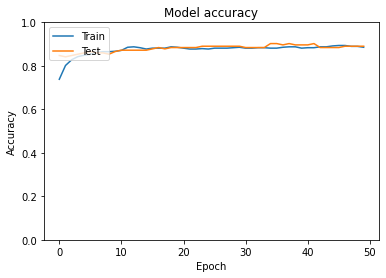

In [ ]:
plt.plot(history_train.history['accuracy'])
plt.plot(history_test.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.autoscale(enable=False, axis='y')
plt.show()

# Grafica de funcion de perdida

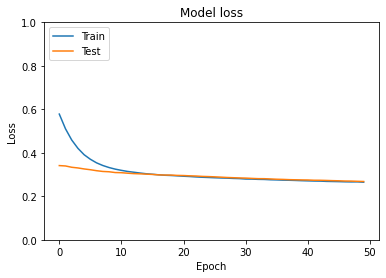

In [ ]:
plt.plot(history_train.history['loss'])
plt.plot(history_test.history['loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.autoscale(enable=False, axis='y')
plt.show()

# Segunda prueba

In [ ]:
#Importamos el dataset
csv_data = 'data.csv'

#Utilizamos el parametro header = none dado que no hay fila con las etiquetas.
datos = pd.read_csv(csv_data, header=None)

datos = datos.dropna(how='all')
datos = datos[datos != '?']
datos = datos.dropna(axis = 0)
datos = datos.drop(columns = [3,4,5,6,12], axis = 1)

datos.columns = ['0','1','2','3','4','5','6','7','8','9','10']

#Codificamos [a,b] => [0,1].
datos['0'] = np.where(datos['0'] == "a", 0 , 1)

#Codificamos [t,f] => [0,1].
datos['4'] = np.where(datos['4'] == "f", 0 , 1)
datos['5'] = np.where(datos['5'] == "f", 0 , 1)
datos['7'] = np.where(datos['7'] == "f", 0, 1)
datos['10'] = np.where(datos['10'] == '-', 0, 1)

#Transformamos Dataframe a un arreglo numpy.
X = datos.iloc[:,0:10].values
y = datos.iloc[:,10:11].values

print('Forma de X: ',X.shape)
print('Forma de y: ',y.shape)

#Estandarizacion de los datos 
sc = StandardScaler()
X = sc.fit_transform(X)

#Separamos los datos de entrenamiento y prueba.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

print('Dataset de entrenamiento [X]: ' + str(X_train.shape))
print('Dataset de entrenamiento [y]: ' + str(y_train.shape))
print('-------------------------------')
print('Dataset de prueba [X]: ' + str(X_test.shape))
print('Dataset de prueba [y]: ' + str(y_test.shape))


Forma de X:  (653, 10)
Forma de y:  (653, 1)
Dataset de entrenamiento [X]: (489, 10)
Dataset de entrenamiento [y]: (489, 1)
-------------------------------
Dataset de prueba [X]: (164, 10)
Dataset de prueba [y]: (164, 1)


In [ ]:
#Construimos el modelo de red neuronal
model = Sequential()

#Agregamos las capas
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Compilamos el modelo.
#loss = Funcion de calculo de perdida - binary_crossentropy
#optimizer = Tecnica de calculo de pesos - adam
learning_rate = 0.008
opt = Adam(learning_rate)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy','binary_accuracy'])

In [ ]:
#Entrenamos el modelo
history_train = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
16/16 [==============================] - 1s 3ms/step - loss: 0.5794 - accuracy: 0.7219 - binary_accuracy: 0.7219
Epoch 2/20
16/16 [==============================] - 0s 2ms/step - loss: 0.4049 - accuracy: 0.8405 - binary_accuracy: 0.8405
Epoch 3/20
16/16 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8609 - binary_accuracy: 0.8609
Epoch 4/20
16/16 [==============================] - 0s 2ms/step - loss: 0.3251 - accuracy: 0.8671 - binary_accuracy: 0.8671
Epoch 5/20
16/16 [==============================] - 0s 2ms/step - loss: 0.3104 - accuracy: 0.8773 - binary_accuracy: 0.8773
Epoch 6/20
16/16 [==============================] - 0s 2ms/step - loss: 0.3038 - accuracy: 0.8814 - binary_accuracy: 0.8814
Epoch 7/20
16/16 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.8773 - binary_accuracy: 0.8773
Epoch 8/20
16/16 [==============================] - 0s 3ms/step - loss: 0.2956 - accuracy: 0.8732 - binary_accuracy: 0.8732
Epoch 9/

In [ ]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

6/6 [==============================] - 0s 2ms/step


In [ ]:
#Evaluacion del modelo
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 100.0


In [ ]:
#Testeo del modelo
history_test =  model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=20 )

Epoch 1/20
16/16 [==============================] - 0s 18ms/step - loss: 0.2698 - accuracy: 0.8937 - binary_accuracy: 0.8937 - val_loss: 0.3798 - val_accuracy: 0.8598 - val_binary_accuracy: 0.8598
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.2674 - accuracy: 0.8855 - binary_accuracy: 0.8855 - val_loss: 0.3800 - val_accuracy: 0.8415 - val_binary_accuracy: 0.8415
Epoch 3/20
16/16 [==============================] - 0s 5ms/step - loss: 0.2661 - accuracy: 0.8855 - binary_accuracy: 0.8855 - val_loss: 0.3832 - val_accuracy: 0.8476 - val_binary_accuracy: 0.8476
Epoch 4/20
16/16 [==============================] - 0s 4ms/step - loss: 0.2650 - accuracy: 0.8916 - binary_accuracy: 0.8916 - val_loss: 0.3823 - val_accuracy: 0.8537 - val_binary_accuracy: 0.8537
Epoch 5/20
16/16 [==============================] - 0s 5ms/step - loss: 0.2611 - accuracy: 0.8875 - binary_accuracy: 0.8875 - val_loss: 0.3856 - val_accuracy: 0.8354 - val_binary_accuracy: 0.8354
Epoch 6/20
16/16 [=

GRAFICA ACURACCY


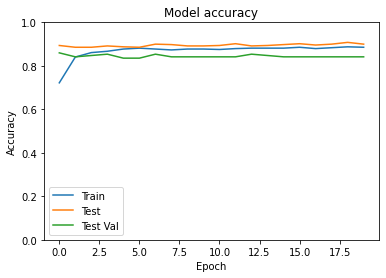

In [ ]:
plt.plot(history_train.history['accuracy'])
plt.plot(history_test.history['accuracy'])
plt.plot(history_test.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test', 'Test Val'], loc='lower left')
plt.autoscale(enable=False, axis='y')
plt.show()

GRAFICA PERDIDA

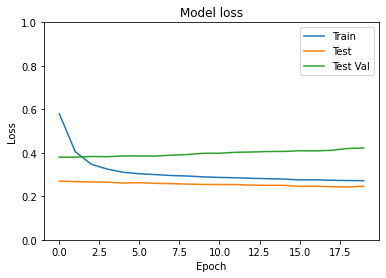

In [ ]:
plt.plot(history_train.history['loss'])
plt.plot(history_test.history['loss']) 
plt.plot(history_test.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test', 'Test Val'], loc='upper right') 
plt.autoscale(enable=False, axis='y')
plt.show()

# Tercera prueba

In [ ]:
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0
 
# Estimate Perceptron weights using stochastic gradient descent
# Se calculan los pesos para las entradas (dendritas) del perceptron.
def train_weights(train, l_rate, n_epoch):
	weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0.0
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			sum_error += error**2
			weights[0] = weights[0] + l_rate * error * 1 #bias
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return weights
 
# Calculo de pesos
dataset = X_train
l_rate = 0.01
n_epoch = 100
weights = train_weights(dataset, l_rate, n_epoch)
print(weights)

In [ ]:
# Calculo de pesos
dataset = X_test
l_rate = 0.01
n_epoch = 100

weights = train_weights(dataset, l_rate, n_epoch)
print(weights)
weights = np.array(weights)
weights = weights.reshape(10, 1)

# Cuarta prueba

In [ ]:
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0
 
# Estimate Perceptron weights using stochastic gradient descent
# Se calculan los pesos para las entradas (dendritas) del perceptron.
def train_weights(train, l_rate, n_epoch):
	weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0.0
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			sum_error += error**2
			weights[0] = weights[0] + l_rate * error * 1 #bias
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return weights
 
# Calculo de pesos
dataset = X_train
l_rate = 0.02
n_epoch = 50
weights = train_weights(dataset, l_rate, n_epoch)
print(weights)

In [ ]:
# Calculo de pesos
dataset = X_test
l_rate = 0.02
n_epoch = 50

weights = train_weights(dataset, l_rate, n_epoch)
print(weights)
weights = np.array(weights)
weights = weights.reshape(10, 1)